## Import Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import dataset

In [27]:
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Explore the data

In [28]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
# Check for missing data 
df.isnull().sum().any()

False

In [30]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Feature Selection

In [31]:
# Taking X as only 2 features to segment customers based on Annual Income and Spending score
X = df.iloc[:,3:5].values

## Import Kmeans for Customer segmentation

In [32]:
from sklearn.cluster import KMeans

### Identify the optimal number of clusters to be used to build model by using Elbow method



In [39]:
wcss = [] 
# An empty list to select K-value based on Within Cluster Sum of squares 
# as a metric for distance between every point in  a cluster and its centroid

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  
    
    

## Plot the number of clusters identified

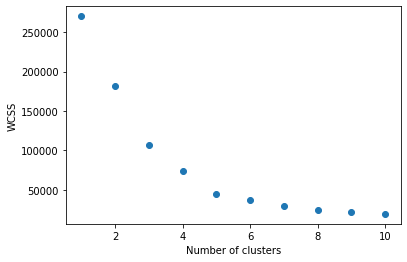

In [42]:
plt.scatter(x=range(1,11),y=wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Train the model and Predict the cutomer segments with 5 clusters


In [45]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42) ## kmeans++ to avoid random initialization trap
y_pred = kmeans.fit_predict(X)

In [50]:
y_pred #Predicted customer segments in groups of Cluster 0,1,2,3 and 4

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [55]:
a = X[y_pred == 0,1]
a

array([61, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55,
       52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52,
       42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52,
       47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42,
       46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 35, 34, 40], dtype=int64)

## Visualising results for the Customer segments based on 2 features

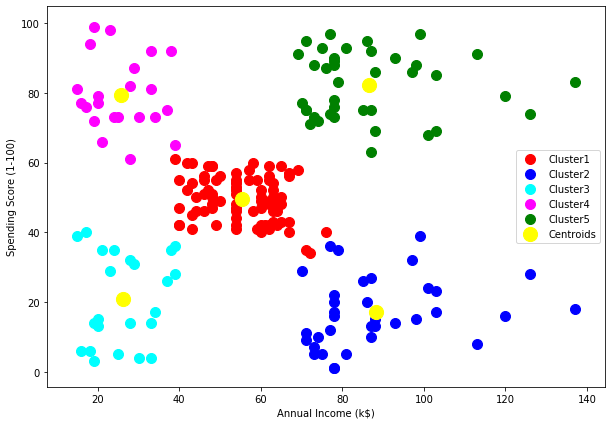

In [67]:
figure = plt.figure(figsize=(10,7))
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100,c='cyan',label='Cluster3')
plt.scatter(X[y_pred==3,0],X[y_pred==3,1],s=100,c='magenta',label='Cluster4')
plt.scatter(X[y_pred==4,0],X[y_pred==4,1],s=100,c='green',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='yellow',label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Conclusion from Customer segments

In [68]:
#Cluster 1 ----> Customers have Average income and Average Spending scores
#Cluster 2 ----> Customers have Good income and Low Spending scores
#Cluster 3 ----> Customers have low income and low Spending scores
#Cluster 4 ----> Customers have low income and High Spending scores
#Cluster 5 ----> Customers have Good income and High Spending scores ---- can be our target customers
